<a href="https://colab.research.google.com/github/ankitg-02/kaggle-competition/blob/main/Loan_approval_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [26]:
test_data = pd.read_csv(r'test.csv')
train_data = pd.read_csv(r'train.csv')
sample_data=pd.read_csv(r'sample_submission.csv')

**For Test Data**

In [27]:
test_data.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [28]:
test_dataframe=pd.DataFrame(test_data)

In [29]:
test_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39098 entries, 0 to 39097
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39098 non-null  int64  
 1   person_age                  39098 non-null  int64  
 2   person_income               39098 non-null  int64  
 3   person_home_ownership       39098 non-null  object 
 4   person_emp_length           39098 non-null  float64
 5   loan_intent                 39098 non-null  object 
 6   loan_grade                  39098 non-null  object 
 7   loan_amnt                   39098 non-null  int64  
 8   loan_int_rate               39098 non-null  float64
 9   loan_percent_income         39098 non-null  float64
 10  cb_person_default_on_file   39098 non-null  object 
 11  cb_person_cred_hist_length  39098 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.6+ MB


In [30]:
test_dataframe.isnull().sum()

,0
id,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_percent_income,0


In [31]:
for i in test_dataframe.columns:
    print(i,':\n',test_dataframe[i].unique())

id :
 [58645 58646 58647 ... 97740 97741 97742]
person_age :
 [23 26 33 32 22 29 25 27 21 38 30 42 28 24 36 37 31 35 40 43 46 39 51 48
 34 50 54 41 44 52 45 47 55 64 57 20 62 53 58 49 70 60 63 59 61 65 56 66
 69 68 84 94]
person_income :
 [ 69000  96000  30000 ...  54480 510000  70399]
person_home_ownership :
 ['RENT' 'MORTGAGE' 'OWN' 'OTHER']
person_emp_length :
 [ 3.  6.  5.  4.  8. 10.  0.  1.  2. 12. 14.  9. 13.  7. 11. 15. 24. 21.
 42. 16. 18. 19. 17. 20. 31. 23. 22. 26. 29. 28. 25.]
loan_intent :
 ['HOMEIMPROVEMENT' 'PERSONAL' 'VENTURE' 'DEBTCONSOLIDATION' 'EDUCATION'
 'MEDICAL']
loan_grade :
 ['F' 'C' 'E' 'A' 'D' 'B' 'G']
loan_amnt :
 [25000 10000  4000  7000 15000 22000  8000  6250  7200 14400 12000 11500
 15250  6000  9000  3000 20000  2950  1000  6500 14000  5000  7500 24250
  2500  2400  9600 13000  5400  4800  2000  5500  3600  1500  4200  8500
 10200 11000 21000  4500 12800 10800 17000 18000  8400  2100 10400  3500
 13175 11300 35000 17500  4900  9350 14500 10750 13200 240

In [32]:
test_dataframe.describe(include="all")

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
count,39098.000000,39098.000000,3.909800e+04,39098,39098.000000,39098,39098,39098.000000,39098.000000,39098.000000,39098,39098.000000
unique,NaN,NaN,NaN,4,NaN,6,7,NaN,NaN,NaN,2,NaN
top,NaN,NaN,NaN,RENT,NaN,EDUCATION,A,NaN,NaN,NaN,N,NaN
freq,NaN,NaN,NaN,20280,NaN,8076,14005,NaN,NaN,NaN,33227,NaN
mean,78193.500000,27.566781,6.406046e+04,NaN,4.687068,NaN,NaN,9251.466188,10.661216,0.159573,NaN,5.830707
std,11286.764749,6.032761,3.795583e+04,NaN,3.868395,NaN,NaN,5576.254680,3.020220,0.091633,NaN,4.072157
min,58645.000000,20.000000,4.000000e+03,NaN,0.000000,NaN,NaN,700.000000,5.420000,0.000000,NaN,2.000000
25%,68419.250000,23.000000,4.200000e+04,NaN,2.000000,NaN,NaN,5000.000000,7.880000,0.090000,NaN,3.000000
50%,78193.500000,26.000000,5.800000e+04,NaN,4.000000,NaN,NaN,8000.000000,10.750000,0.140000,NaN,4.000000
75%,87967.750000,30.000000,7.588500e+04,NaN,7.000000,NaN,NaN,12000.000000,12.990000,0.210000,NaN,8.000000


In [33]:
mod_test_data=test_dataframe.drop(columns=['id'],axis=1)

In [34]:
mod_test_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [35]:
mod_test_data.describe(include="all")

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
count,39098.000000,3.909800e+04,39098,39098.000000,39098,39098,39098.000000,39098.000000,39098.000000,39098,39098.000000
unique,NaN,NaN,4,NaN,6,7,NaN,NaN,NaN,2,NaN
top,NaN,NaN,RENT,NaN,EDUCATION,A,NaN,NaN,NaN,N,NaN
freq,NaN,NaN,20280,NaN,8076,14005,NaN,NaN,NaN,33227,NaN
mean,27.566781,6.406046e+04,NaN,4.687068,NaN,NaN,9251.466188,10.661216,0.159573,NaN,5.830707
std,6.032761,3.795583e+04,NaN,3.868395,NaN,NaN,5576.254680,3.020220,0.091633,NaN,4.072157
min,20.000000,4.000000e+03,NaN,0.000000,NaN,NaN,700.000000,5.420000,0.000000,NaN,2.000000
25%,23.000000,4.200000e+04,NaN,2.000000,NaN,NaN,5000.000000,7.880000,0.090000,NaN,3.000000
50%,26.000000,5.800000e+04,NaN,4.000000,NaN,NaN,8000.000000,10.750000,0.140000,NaN,4.000000
75%,30.000000,7.588500e+04,NaN,7.000000,NaN,NaN,12000.000000,12.990000,0.210000,NaN,8.000000


person_age :
 mean of person_age : 27.566780909509436 
 median of person_age : 26.0 
 mode of person_age : 0    23
Name: person_age, dtype: int64 
 standardisation of person_age: 6.032760769126803 
 variance of person_age: 36.394202497515415 



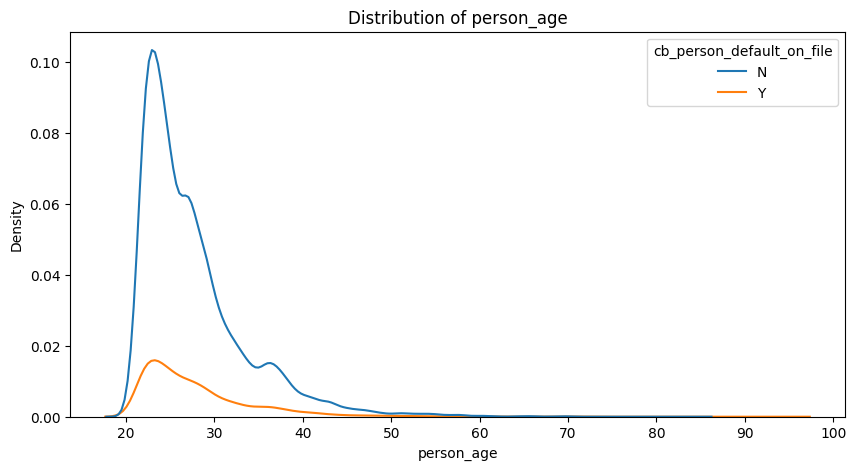



person_income :
 mean of person_income : 64060.4608419868 
 median of person_income : 58000.0 
 mode of person_income : 0    60000
Name: person_income, dtype: int64 
 standardisation of person_income: 37955.82870531899 
 variance of person_income: 1440644932.7075171 



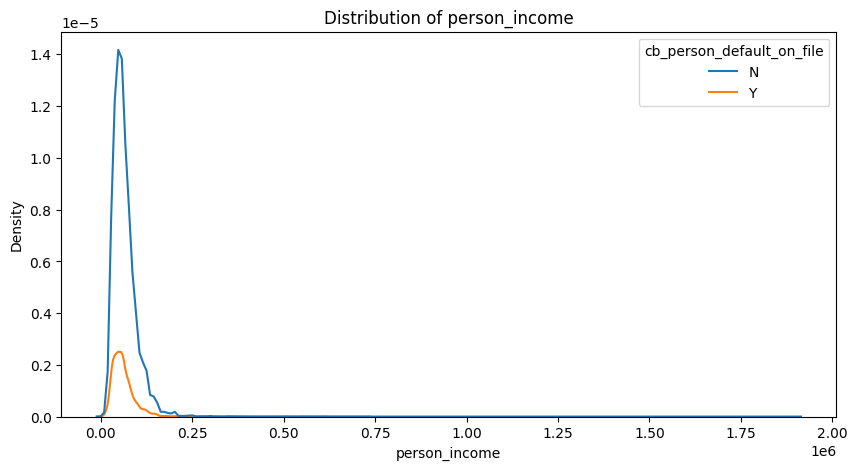



loan_amnt :
 mean of loan_amnt : 9251.466187528775 
 median of loan_amnt : 8000.0 
 mode of loan_amnt : 0    10000
Name: loan_amnt, dtype: int64 
 standardisation of loan_amnt: 5576.254679555594 
 variance of loan_amnt: 31094616.251265656 



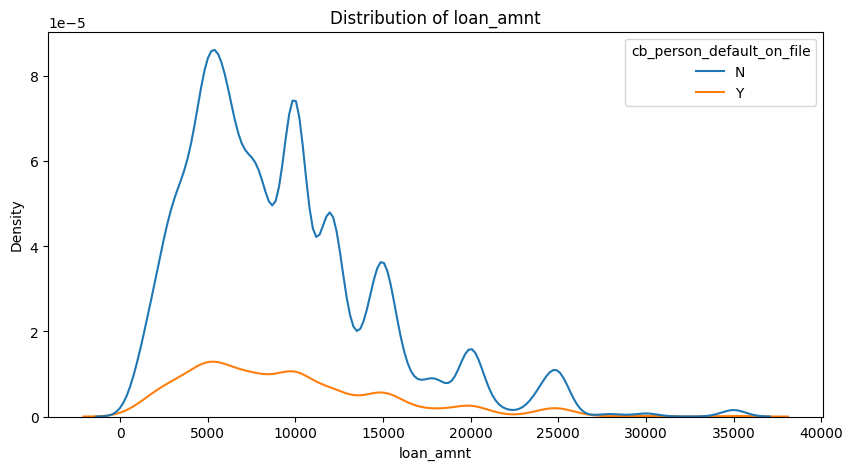



cb_person_cred_hist_length :
 mean of cb_person_cred_hist_length : 5.830707453066653 
 median of cb_person_cred_hist_length : 4.0 
 mode of cb_person_cred_hist_length : 0    2
Name: cb_person_cred_hist_length, dtype: int64 
 standardisation of cb_person_cred_hist_length: 4.072156720755155 
 variance of cb_person_cred_hist_length: 16.582460358391373 



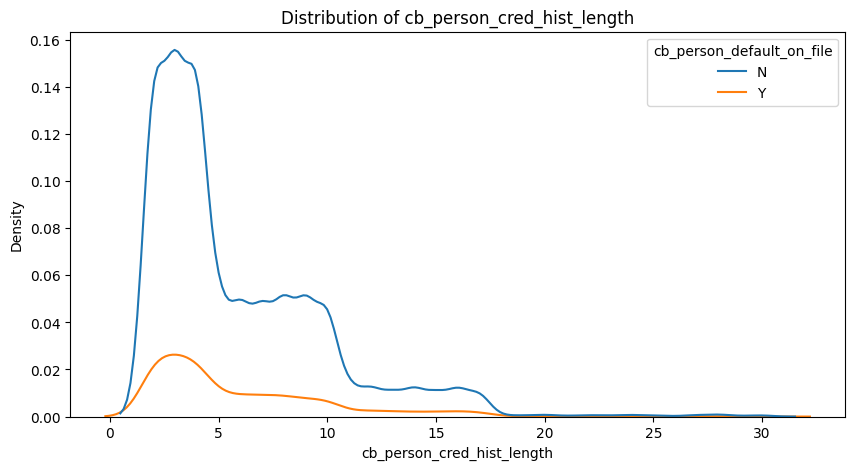

In [36]:
for i in mod_test_data.columns:
    if mod_test_data[i].dtype=='int':
        print(i,':\n',f"mean of {i} :",mod_test_data[i].mean(),'\n',
              f"median of {i} :",mod_test_data[i].median(),'\n',
              f"mode of {i} :",mod_test_data[i].mode(),'\n',
              f"standardisation of {i}:",mod_test_data[i].std(),'\n',
              f"variance of {i}:",mod_test_data[i].var(),'\n')
        plt.figure(figsize=(10,5))
        sns.kdeplot(data=mod_test_data, x=i, hue='cb_person_default_on_file')
        plt.title(f'Distribution of {i}')
        plt.show()
        print('\n')

person_emp_length :
 mean of person_emp_length : 4.687068392245128 
 median of person_emp_length : 4.0 
 mode of person_emp_length : 0    0.0
Name: person_emp_length, dtype: float64 
 standardisation of person_emp_length: 3.8683950398901477 
 variance of person_emp_length: 14.964480184646696 



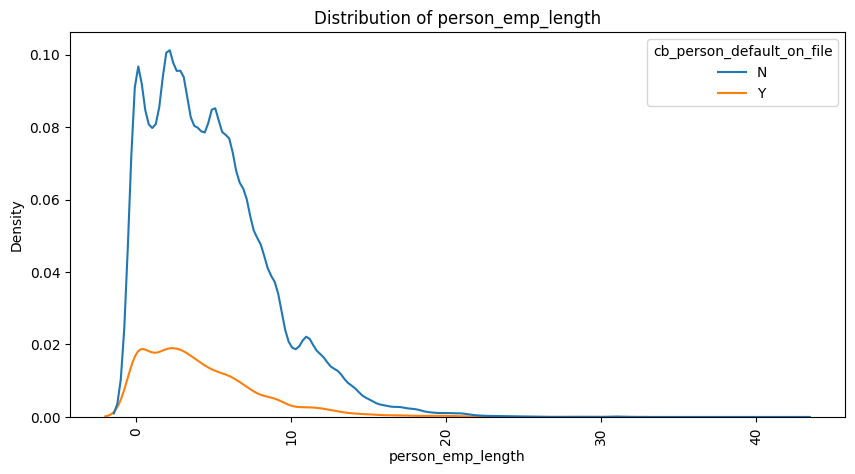



loan_int_rate :
 mean of loan_int_rate : 10.661215918972838 
 median of loan_int_rate : 10.75 
 mode of loan_int_rate : 0    10.99
Name: loan_int_rate, dtype: float64 
 standardisation of loan_int_rate: 3.020219615559393 
 variance of loan_int_rate: 9.121726526209727 



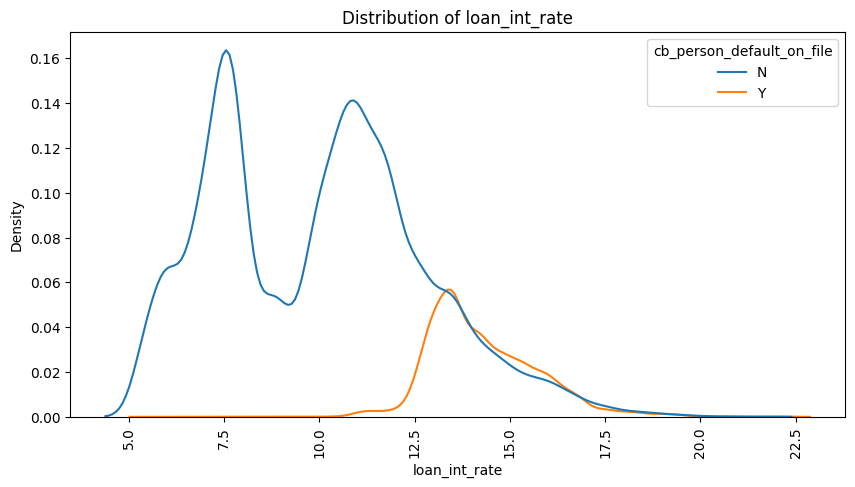



loan_percent_income :
 mean of loan_percent_income : 0.1595732774054939 
 median of loan_percent_income : 0.14 
 mode of loan_percent_income : 0    0.13
Name: loan_percent_income, dtype: float64 
 standardisation of loan_percent_income: 0.09163339703758701 
 variance of loan_percent_income: 0.00839667945264806 



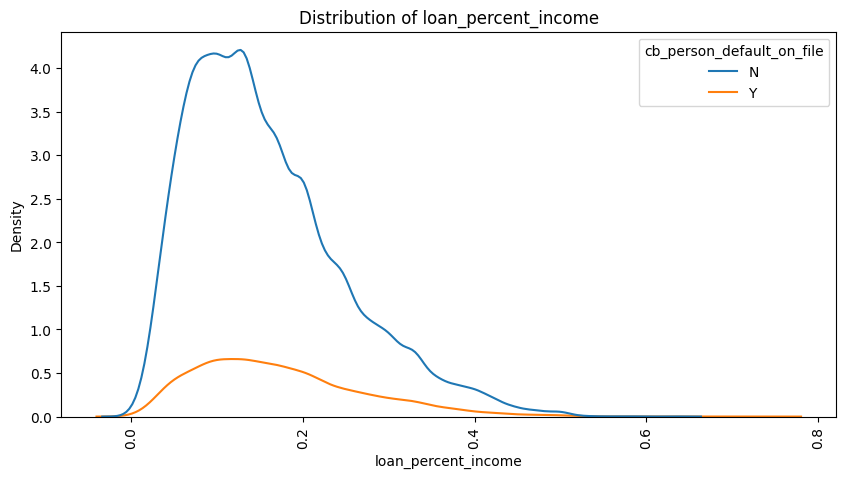

In [37]:
for i in mod_test_data.columns:
    if mod_test_data[i].dtype=='float':
        print(i,':\n',f"mean of {i} :",mod_test_data[i].mean(),'\n',
              f"median of {i} :",mod_test_data[i].median(),'\n',
              f"mode of {i} :",mod_test_data[i].mode(),'\n',
              f"standardisation of {i}:",mod_test_data[i].std(),'\n',
              f"variance of {i}:",mod_test_data[i].var(),'\n')
        plt.figure(figsize=(10, 5))
        sns.kdeplot(data=mod_test_data, x=i, hue='cb_person_default_on_file')
        plt.xticks(rotation=90)
        plt.title(f'Distribution of {i}')
        plt.show()
        print('\n')

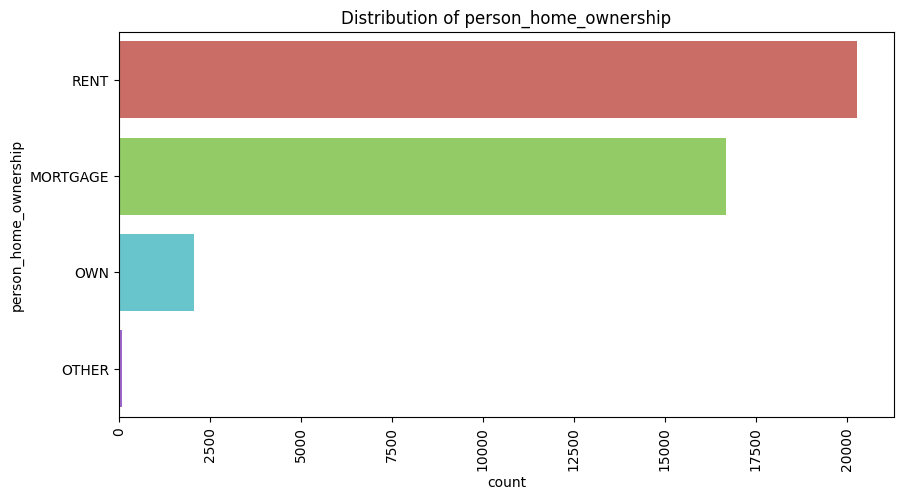

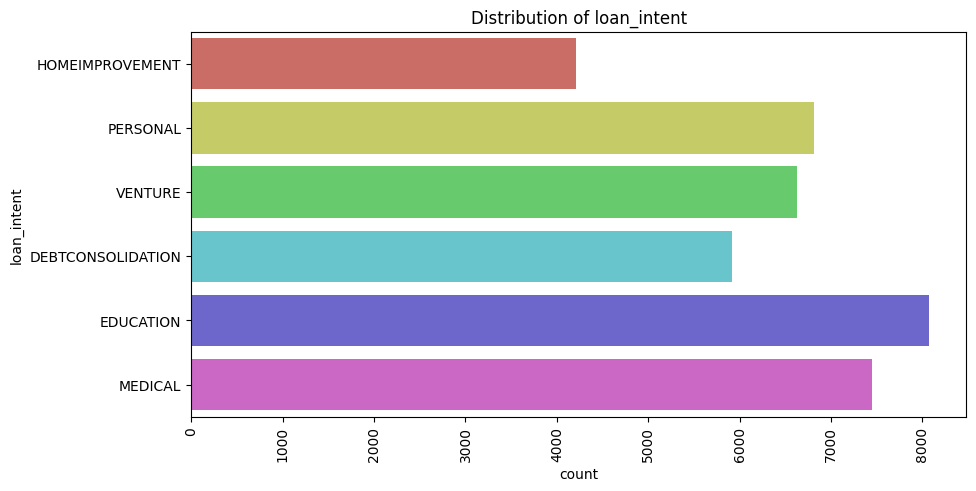

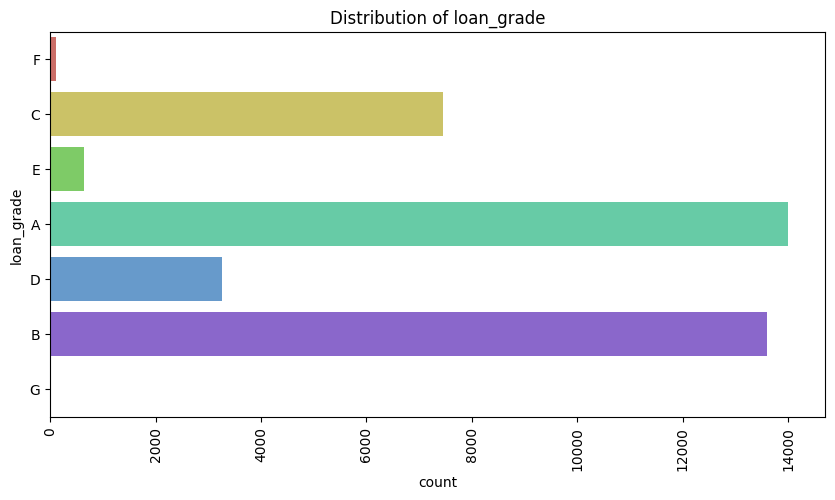

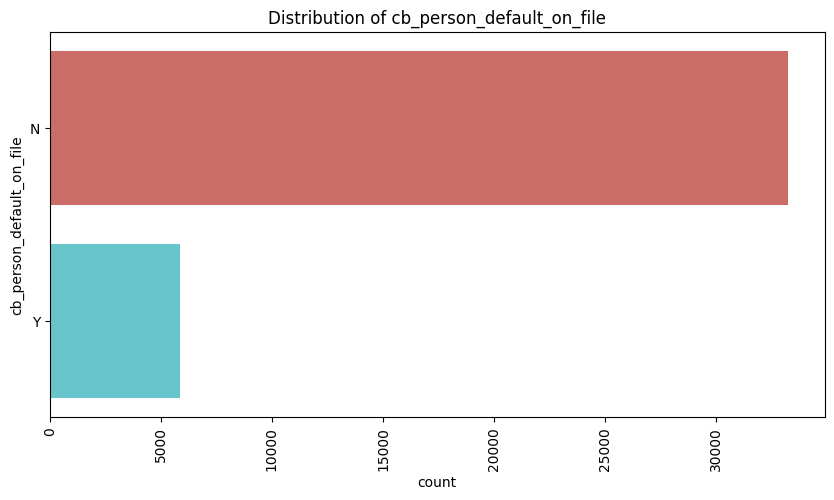

In [38]:
for i in mod_test_data.columns:
    if mod_test_data[i].dtype=='object':
        plt.figure(figsize=(10,5))
        sns.countplot(mod_test_data[i],palette='hls')
        plt.xticks(rotation=90)
        plt.title(f'Distribution of {i}')
        plt.show()
        print('\n')

In [39]:
train_data.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


**For Train Data**

In [40]:
mod_train_data=train_data.drop(columns=['id'],axis=1)

In [41]:
mod_train_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [42]:
mod_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  58645 non-null  int64  
 1   person_income               58645 non-null  int64  
 2   person_home_ownership       58645 non-null  object 
 3   person_emp_length           58645 non-null  float64
 4   loan_intent                 58645 non-null  object 
 5   loan_grade                  58645 non-null  object 
 6   loan_amnt                   58645 non-null  int64  
 7   loan_int_rate               58645 non-null  float64
 8   loan_percent_income         58645 non-null  float64
 9   cb_person_default_on_file   58645 non-null  object 
 10  cb_person_cred_hist_length  58645 non-null  int64  
 11  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 5.4+ MB


In [43]:
mod_train_data.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_percent_income,0
cb_person_default_on_file,0


In [44]:
for i in mod_train_data.columns:
    print(i,':\n',mod_train_data[i].unique(),'\n')

person_age :
 [ 37  22  29  30  27  25  21  35  31  26  28  32  23  24  33  44  38  43
  46  48  36  41  34  40  47  42  51  50  39  56  60  49  58  54  45  59
  65  53  55  57  52  62  64  84  70  66  73  69  61  20  80  76 123] 

person_income :
 [ 35000  56000  28800 ...  44955  90730 124600] 

person_home_ownership :
 ['RENT' 'OWN' 'MORTGAGE' 'OTHER'] 

person_emp_length :
 [  0.   6.   8.  14.   2.   9.  11.   5.   1.  13.   3.  10.  12.   4.
   7.  21.  17.  16.  18.  19.  15.  20.  23.  24.  26.  22.  25.  41.
  27.  28.  35.  29.  30.  31. 123.  39.] 

loan_intent :
 ['EDUCATION' 'MEDICAL' 'PERSONAL' 'VENTURE' 'DEBTCONSOLIDATION'
 'HOMEIMPROVEMENT'] 

loan_grade :
 ['B' 'C' 'A' 'D' 'E' 'F' 'G'] 

loan_amnt :
 [ 6000  4000 12000  9000  2500  5000 15000 12800 10000 16000  7300 17000
  5950  4800  3200  7000  3000  3500 14000  2800  2000  5500 14400 15900
 12500  8000  2400 20000 14125  9600 17200  4200  7200 18000 23500  3550
  9800 24000 19500  6500 17500  4500 19750 28000 25000

In [45]:
mod_train_data.describe(include="all")

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
count,58645.000000,5.864500e+04,58645,58645.000000,58645,58645,58645.000000,58645.000000,58645.000000,58645,58645.000000,58645.000000
unique,NaN,NaN,4,NaN,6,7,NaN,NaN,NaN,2,NaN,NaN
top,NaN,NaN,RENT,NaN,EDUCATION,A,NaN,NaN,NaN,N,NaN,NaN
freq,NaN,NaN,30594,NaN,12271,20984,NaN,NaN,NaN,49943,NaN,NaN
mean,27.550857,6.404617e+04,NaN,4.701015,NaN,NaN,9217.556518,10.677874,0.159238,NaN,5.813556,0.142382
std,6.033216,3.793111e+04,NaN,3.959784,NaN,NaN,5563.807384,3.034697,0.091692,NaN,4.029196,0.349445
min,20.000000,4.200000e+03,NaN,0.000000,NaN,NaN,500.000000,5.420000,0.000000,NaN,2.000000,0.000000
25%,23.000000,4.200000e+04,NaN,2.000000,NaN,NaN,5000.000000,7.880000,0.090000,NaN,3.000000,0.000000
50%,26.000000,5.800000e+04,NaN,4.000000,NaN,NaN,8000.000000,10.750000,0.140000,NaN,4.000000,0.000000
75%,30.000000,7.560000e+04,NaN,7.000000,NaN,NaN,12000.000000,12.990000,0.210000,NaN,8.000000,0.000000


person_age :
 mean of person_age : 27.550856850541393 
 median of person_age : 26.0 
 mode of person_age : 0    23
Name: person_age, dtype: int64 
 standardisation of person_age: 6.033215771226305 
 variance of person_age: 36.39969254217382 



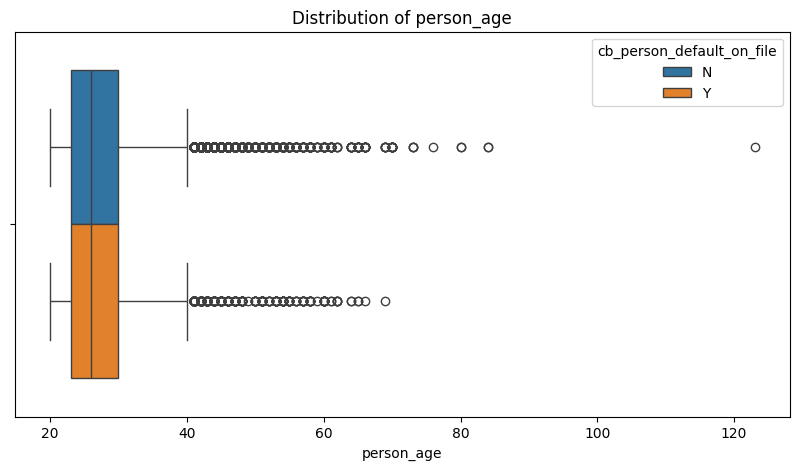

iqr of person_age : 7.0
lower bound of person_age : 12.5
upper bound of person_age : 40.5


person_income :
 mean of person_income : 64046.17287066246 
 median of person_income : 58000.0 
 mode of person_income : 0    60000
Name: person_income, dtype: int64 
 standardisation of person_income: 37931.106978500095 
 variance of person_income: 1438768876.6144187 



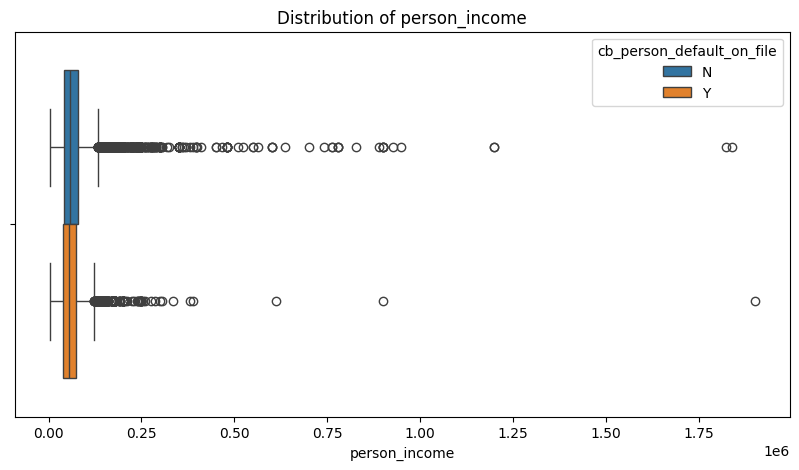

iqr of person_income : 33600.0
lower bound of person_income : -8400.0
upper bound of person_income : 126000.0


loan_amnt :
 mean of loan_amnt : 9217.556518032228 
 median of loan_amnt : 8000.0 
 mode of loan_amnt : 0    10000
Name: loan_amnt, dtype: int64 
 standardisation of loan_amnt: 5563.807384163861 
 variance of loan_amnt: 30955952.6080763 



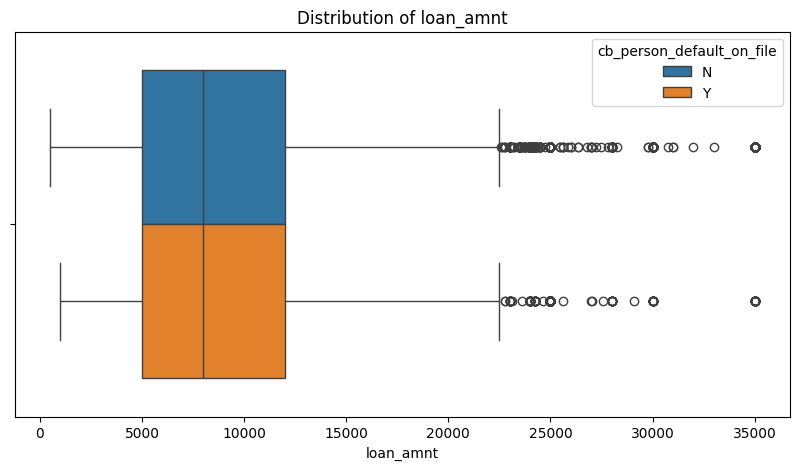

iqr of loan_amnt : 7000.0
lower bound of loan_amnt : -5500.0
upper bound of loan_amnt : 22500.0


cb_person_cred_hist_length :
 mean of cb_person_cred_hist_length : 5.813556142893682 
 median of cb_person_cred_hist_length : 4.0 
 mode of cb_person_cred_hist_length : 0    3
Name: cb_person_cred_hist_length, dtype: int64 
 standardisation of cb_person_cred_hist_length: 4.029196153525222 
 variance of cb_person_cred_hist_length: 16.23442164358244 



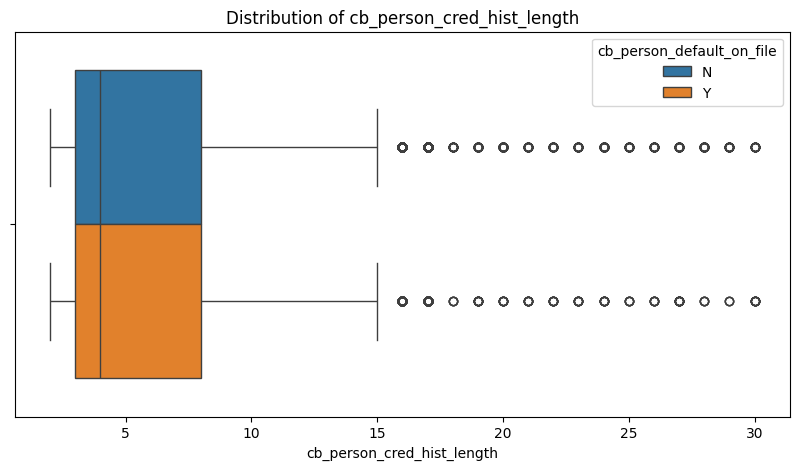

iqr of cb_person_cred_hist_length : 5.0
lower bound of cb_person_cred_hist_length : -4.5
upper bound of cb_person_cred_hist_length : 15.5


loan_status :
 mean of loan_status : 0.14238212976383324 
 median of loan_status : 0.0 
 mode of loan_status : 0    0
Name: loan_status, dtype: int64 
 standardisation of loan_status: 0.3494446180776064 
 variance of loan_status: 0.12211154110340422 



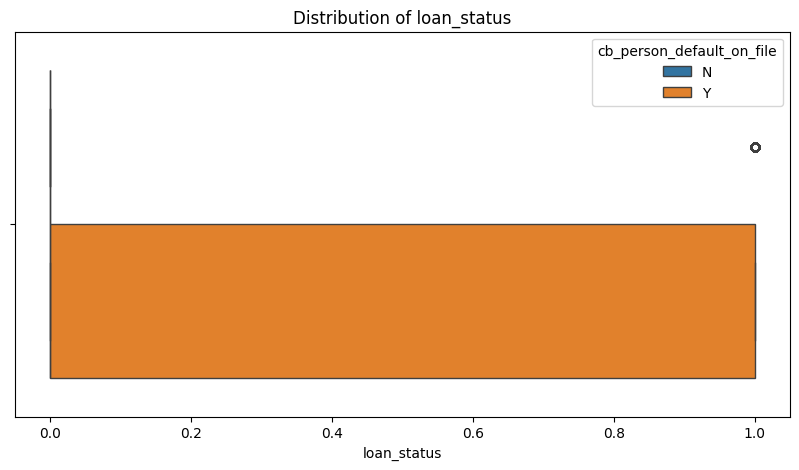

iqr of loan_status : 0.0
lower bound of loan_status : 0.0
upper bound of loan_status : 0.0




In [52]:
for i in mod_train_data.columns:
    if mod_train_data[i].dtype=='int':
        print(i,':\n',f"mean of {i} :",mod_train_data[i].mean(),'\n',
              f"median of {i} :",mod_train_data[i].median(),'\n',
              f"mode of {i} :",mod_train_data[i].mode(),'\n',
              f"standardisation of {i}:",mod_train_data[i].std(),'\n',
              f"variance of {i}:",mod_train_data[i].var(),'\n')
        plt.figure(figsize=(10,5))
        sns.boxplot(data=mod_train_data, x=i, hue='cb_person_default_on_file')
        plt.title(f'Distribution of {i}')
        plt.show()
        q3=mod_train_data[i].quantile(0.75)
        q1=mod_train_data[i].quantile(0.25)
        iqr=q3-q1
        lower_bound=q1-1.5*iqr
        upper_bound=q3+1.5*iqr
        print(f"iqr of {i} :",iqr)
        print(f"lower bound of {i} :",lower_bound)
        print(f"upper bound of {i} :",upper_bound)
        print('\n')

person_emp_length :
 mean of person_emp_length : 4.701014579248017 
 median of person_emp_length : 4.0 
 mode of person_emp_length : 0    0.0
Name: person_emp_length, dtype: float64 
 standardisation of person_emp_length: 3.9597843444189302 
 variance of person_emp_length: 15.679892054305258 



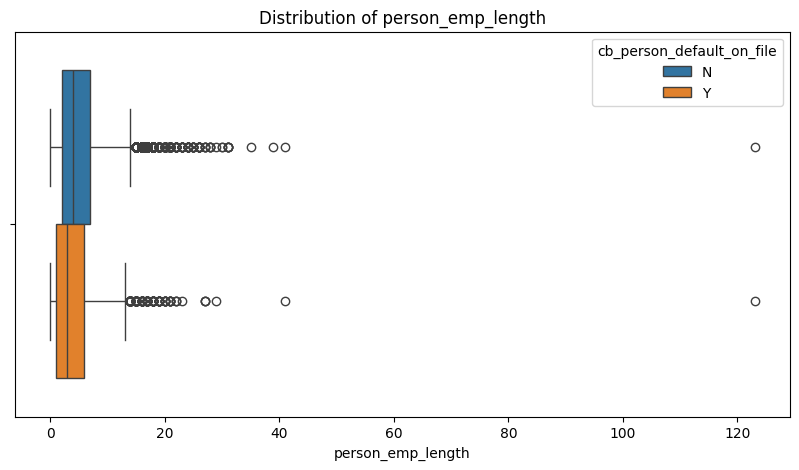

iqr of person_emp_length : 5.0
lower bound of person_emp_length : -5.5
upper bound of person_emp_length : 14.5


loan_int_rate :
 mean of loan_int_rate : 10.67787449910478 
 median of loan_int_rate : 10.75 
 mode of loan_int_rate : 0    10.99
Name: loan_int_rate, dtype: float64 
 standardisation of loan_int_rate: 3.0346972031377084 
 variance of loan_int_rate: 9.209387114731829 



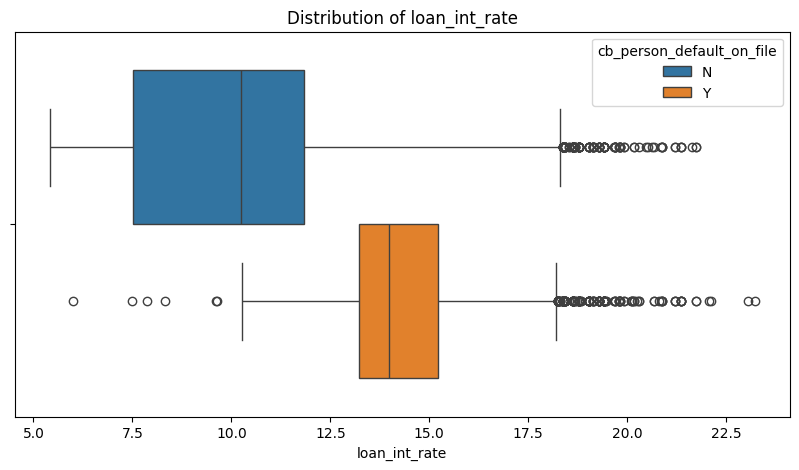

iqr of loan_int_rate : 5.11
lower bound of loan_int_rate : 0.21499999999999897
upper bound of loan_int_rate : 20.655


loan_percent_income :
 mean of loan_percent_income : 0.15923751385454857 
 median of loan_percent_income : 0.14 
 mode of loan_percent_income : 0    0.1
Name: loan_percent_income, dtype: float64 
 standardisation of loan_percent_income: 0.09169179303584088 
 variance of loan_percent_income: 0.008407384910127479 



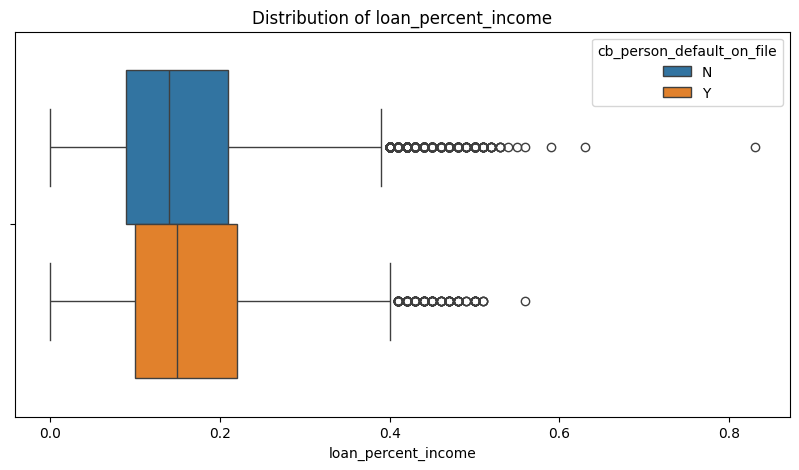

iqr of loan_percent_income : 0.12
lower bound of loan_percent_income : -0.09
upper bound of loan_percent_income : 0.39




In [53]:
for i in mod_train_data.columns:
    if mod_train_data[i].dtype=='float':
        print(i,':\n',f"mean of {i} :",mod_train_data[i].mean(),'\n',
              f"median of {i} :",mod_train_data[i].median(),'\n',
              f"mode of {i} :",mod_train_data[i].mode(),'\n',
              f"standardisation of {i}:",mod_train_data[i].std(),'\n',
              f"variance of {i}:",mod_train_data[i].var(),'\n')
        plt.figure(figsize=(10,5))
        sns.boxplot(data=mod_train_data, x=i, hue='cb_person_default_on_file')
        plt.title(f'Distribution of {i}')
        plt.show()
        q3=mod_train_data[i].quantile(0.75)
        q1=mod_train_data[i].quantile(0.25)
        iqr=q3-q1
        lower_bound=q1-1.5*iqr
        upper_bound=q3+1.5*iqr
        print(f"iqr of {i} :",iqr)
        print(f"lower bound of {i} :",lower_bound)
        print(f"upper bound of {i} :",upper_bound)
        print('\n')

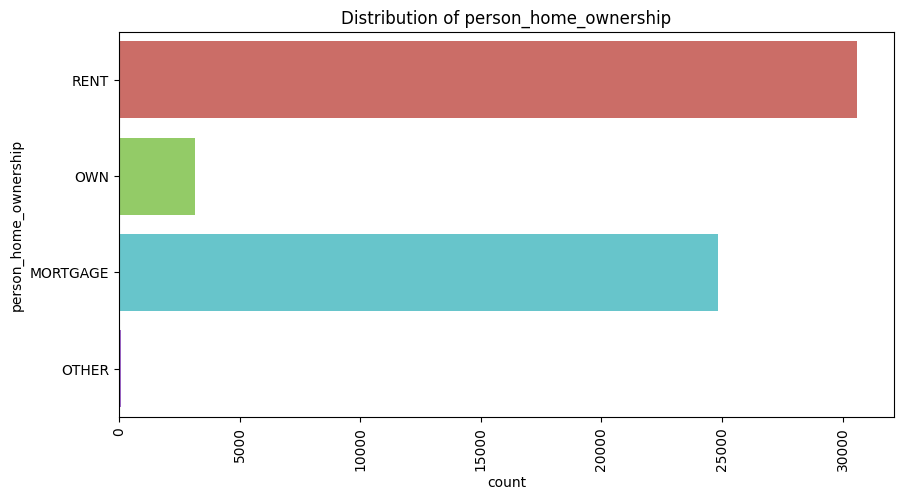

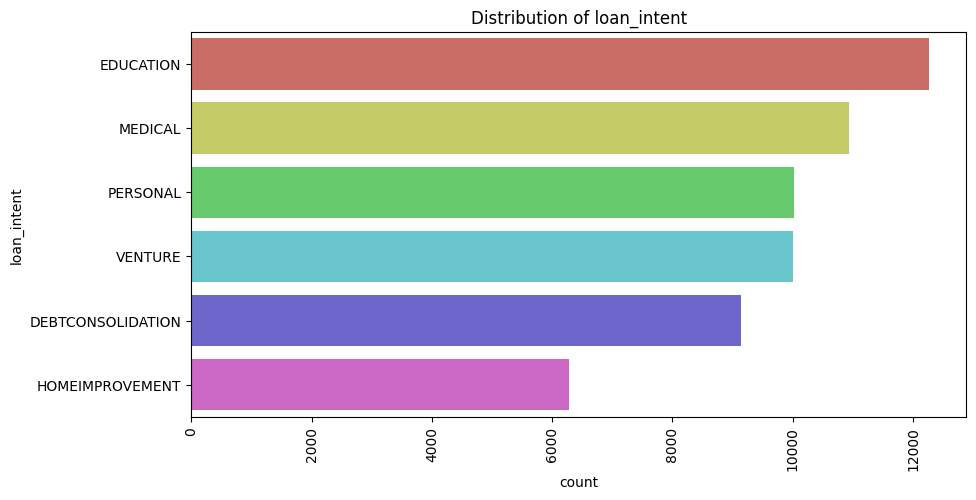

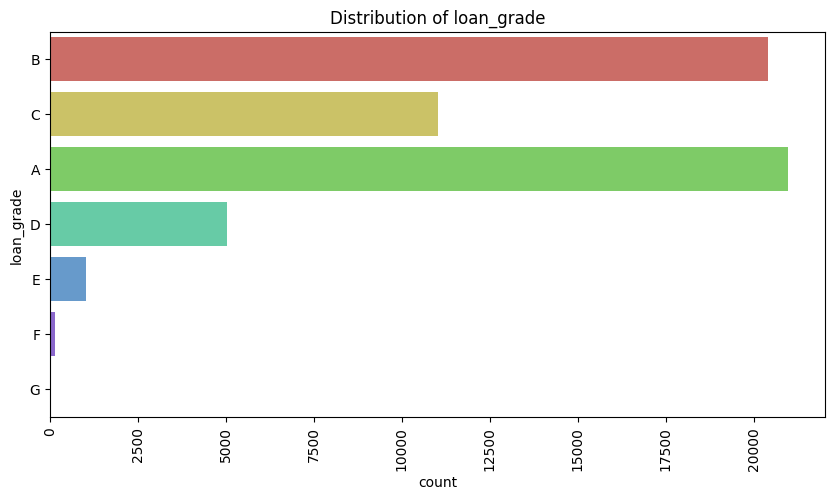

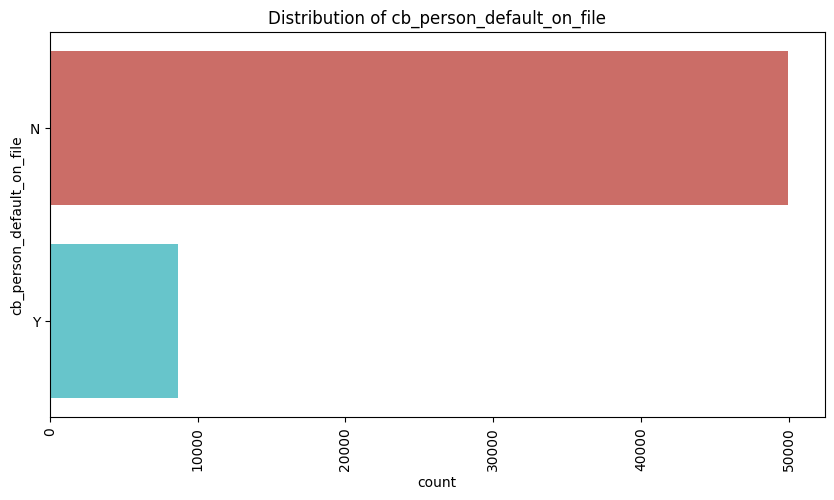

In [54]:
for i in mod_train_data.columns:
    if mod_train_data[i].dtype=='object':
        plt.figure(figsize=(10,5))
        sns.countplot(mod_train_data[i],palette='hls')
        plt.xticks(rotation=90)
        plt.title(f'Distribution of {i}')
        plt.show()
        print('\n')

In [57]:
mod_train_data=mod_train_data[
    (mod_train_data['person_age']>=12.5) & (mod_train_data['person_age']<=40.5) &
    (mod_train_data['person_income']>0) & (mod_train_data['person_income']<=126000.0) &
    (mod_train_data['loan_amnt']>0) & (mod_train_data['loan_amnt']<=22500.0) &
    (mod_train_data['cb_person_cred_hist_length']>0) & (mod_train_data['cb_person_cred_hist_length']<=15.5) &
    (mod_train_data['person_emp_length']>0) & (mod_train_data['person_emp_length']<=14.5) &
    (mod_train_data['loan_int_rate']>=0.21499999999999897) & (mod_train_data['loan_int_rate']<=20.655) &
    (mod_train_data['loan_percent_income']>0) & (mod_train_data['loan_percent_income']<=0.39)
]

In [62]:
s=StandardScaler()
for i in mod_train_data.columns:
    if mod_train_data[i].dtype=="int":
        mod_train_data[i]=s.fit_transform(mod_train_data[[i]])
    elif mod_train_data[i].dtype=="float":
        mod_train_data[i]=s.fit_transform(mod_train_data[[i]])

In [68]:
oe = OrdinalEncoder()
transformers = [
    ('home_ownership', oe, ['person_home_ownership']),
    ('loan_intent', oe, ['loan_intent']),
    ('loan_grade', oe, ['loan_grade']),
    ('default_on_file', oe, ['cb_person_default_on_file'])
]
ct = ColumnTransformer(transformers, remainder='passthrough')
mod_train_data = ct.fit_transform(mod_train_data)